In [58]:
import psycopg2
import matplotlib.pyplot as plt
import pandas as pd
import os
import matplotlib.dates as mdates

In [59]:
# open file /run/secrets/postgres_pwd
with open(os.getenv("POSTGRES_PASSWORD_FILE"), 'r') as file:
    password = file.read().strip()

# Connect to your postgres DB
conn = psycopg2.connect(
    host="postgres",      # or IP address
    port=5432,             # default postgres port
    database=os.getenv("POSTGRES_DB"),
    user=os.getenv("POSTGRES_USER"),
    password="mysecretpassword"
)

In [60]:
with conn:
    with conn.cursor() as cur:
        sql = "SELECT event_time::date AS date, count(*) AS putchases \
        FROM customers \
        WHERE event_type='purchase' AND (event_time::date BETWEEN '2022-10-01' AND '2023-02-28') \
        GROUP BY event_time::date \
        ORDER BY date;"
        cur.execute(sql)
        data_1 = cur.fetchall()

In [61]:
df_1 = pd.DataFrame(data_1, columns=['date', 'purchases']).set_index('date')

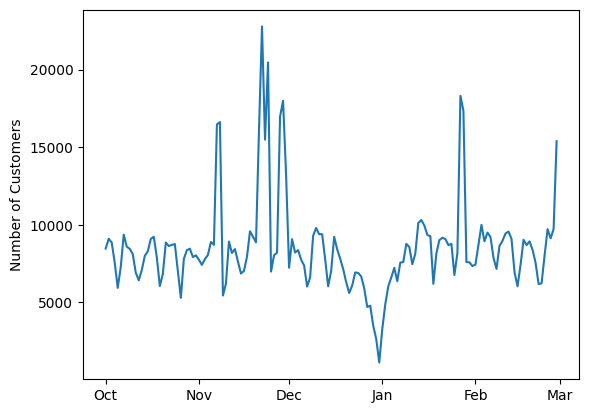

In [62]:

fig, ax = plt.subplots()
# ax.xaxis.set_major_locator(plt.MaxNLocator(5))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
ax.set_ylabel('Number of Customers')
ax.plot(df_1.index, df_1['purchases'])
plt.show()

In [63]:
with conn:
    with conn.cursor() as cur:
        sql = "SELECT TO_CHAR(event_time, 'YYYY-MM') AS order_month, SUM(price) \
            FROM customers \
            WHERE event_type='purchase' \
            GROUP BY TO_CHAR(event_time, 'YYYY-MM');"
        cur.execute(sql)
        data_2 = cur.fetchall()

In [64]:
df_2 = pd.DataFrame(data_2, columns=['order_month', 'total_price']).set_index('order_month')

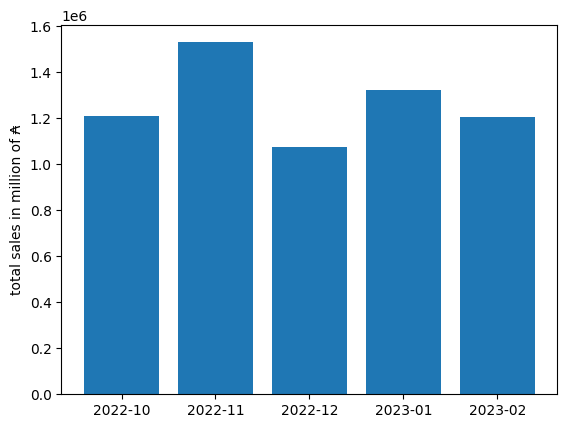

In [65]:
fig, ax = plt.subplots()
ax.bar(df_2.index, df_2['total_price'])
# ₳ is the currency symbol for the Argentine peso
# A$ is the currency symbol for the Australian dollar
ax.set_ylabel('total sales in million of ₳')
plt.show()

In [66]:
with conn:
    with conn.cursor() as cur:
        sql = """SELECT 
                    event_time::date AS date,
                    SUM(price),
                    COUNT(*) AS order,
                    COUNT(DISTINCT user_id) AS users,
                    SUM(price) / COUNT(DISTINCT user_id) AS avg
                FROM customers
                WHERE event_type='purchase'
                GROUP BY event_time::date;"""
        cur.execute(sql)
        data_3 = cur.fetchall()

In [67]:
df_3 = pd.DataFrame(data_3, columns=['date', 'price', 'orders', 'users', 'avg']).set_index('date')

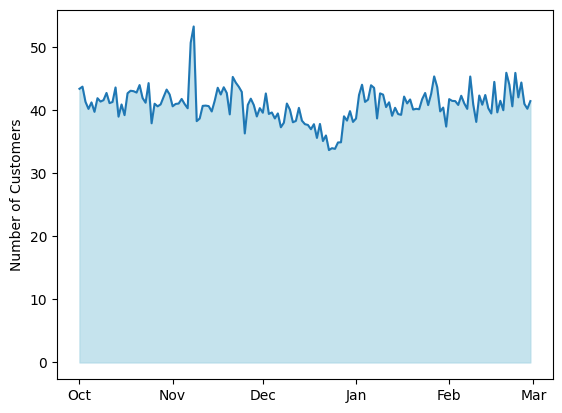

In [68]:
fig, ax = plt.subplots()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
ax.set_ylabel('Number of Customers')
ax.fill_between(df_3.index, df_3['avg'], color='lightblue', alpha=0.7)
ax.plot(df_3.index, df_3['avg'], label='avg')
plt.show()